# **Project: Investigate TMDB Movies**

## **Table of Contents**
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## **Introduction**

* **Data**
    * The Dataset used in this project contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.
    * The Dataset was cleaned from original data on <a href="https://www.kaggle.com/tmdb/tmdb-movie-metadata">Kaggle</a>
    * The final two columns ending with “_adj” show the budget and revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time
* **Questions**
    * Which genres are most popular from year to year? 
    * Top 10 popular movies vs Top 10 voted movies?
    * Which movie is the most profitable?
    * What kinds of properties are associated with movies that have high revenues?
* **Imports**
    * **pandas** for data manipulation 
    * **inline matplotlib** for visualizations within the notebook
    * **seaborn** for the heatmap 

In [298]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## **Data Wrangling**

Use Pandas to load and preview sample of the data

In [279]:
# load csv file
df = pd.read_csv('tmdb-movies.csv')
df.head(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08


In [280]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [281]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [282]:
df.duplicated().sum()

1

In [283]:
# Checking for NULL Values
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

**Explored Results**
1. There are 10866 movies in this dataset and 21 columns
2. Now we have some null values in `['imdb_id','cast','director','generes','production_companies']`, and we have 1 duplicated row.

### Data Cleaning
1. Drop Columns unwanted so that we remove fewer nullable rows
2. Drop null rows
3. Drop Duplicated rows
4. For profit question, we will handle zero values in budget/adj and revenue/adj and then we will calculate profit

In [284]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.

# drop unwanted columns
df.drop(columns=['id','imdb_id','homepage','tagline','keywords','overview','runtime','cast','production_companies'], inplace=True)

# drop nulls
df.dropna(inplace=True)

# drop duplicates
df.drop_duplicates(inplace=True)

# reset index because its getting missed up after dropping rows
df.reset_index(drop=True, inplace=True)

In [285]:
# replace the zero values with the mean of the column
df['budget'].replace(0,df['budget'].mean(), inplace=True)
df['revenue'].replace(0,df['revenue'].mean(), inplace=True)
df['budget_adj'].replace(0,df['budget_adj'].mean(), inplace=True)
df['revenue_adj'].replace(0,df['revenue_adj'].mean(), inplace=True)

In [286]:
# add column profit
df['profit'] = df['revenue'] - df['budget']
df['profit_adj'] = df['revenue_adj'] - df['budget_adj']

In [287]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10800 entries, 0 to 10799
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   popularity      10800 non-null  float64
 1   budget          10800 non-null  float64
 2   revenue         10800 non-null  float64
 3   original_title  10800 non-null  object 
 4   director        10800 non-null  object 
 5   genres          10800 non-null  object 
 6   release_date    10800 non-null  object 
 7   vote_count      10800 non-null  int64  
 8   vote_average    10800 non-null  float64
 9   release_year    10800 non-null  int64  
 10  budget_adj      10800 non-null  float64
 11  revenue_adj     10800 non-null  float64
 12  profit          10800 non-null  float64
 13  profit_adj      10800 non-null  float64
dtypes: float64(8), int64(2), object(4)
memory usage: 1.2+ MB


In [288]:
df.describe()

,popularity,budget,revenue,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit,profit_adj
count,10800.000000,1.080000e+04,1.080000e+04,10800.000000,10800.000000,10800.000000,1.080000e+04,1.080000e+04,1.080000e+04,1.080000e+04
mean,0.649455,2.238817e+07,6.214616e+07,218.600741,5.970880,2001.289537,2.686734e+07,8.015698e+07,3.975799e+07,5.328964e+07
std,1.002441,2.807649e+07,1.113169e+08,577.165055,0.933006,12.819545,3.057304e+07,1.369205e+08,9.365917e+07,1.210149e+08
min,0.000188,1.000000e+00,2.000000e+00,10.000000,1.500000,1960.000000,9.210911e-01,2.370705e+00,-4.139124e+08,-4.139124e+08
25%,0.209156,1.471114e+07,4.006558e+07,17.000000,5.400000,1995.000000,1.765437e+07,5.167714e+07,1.406558e+07,1.971842e+07
50%,0.385471,1.471114e+07,4.006558e+07,39.000000,6.000000,2006.000000,1.765437e+07,5.167714e+07,2.535444e+07,3.402276e+07
75%,0.717508,1.564374e+07,4.006558e+07,147.000000,6.600000,2011.000000,2.103337e+07,5.167714e+07,2.871174e+07,3.939494e+07
max,32.985763,4.250000e+08,2.781506e+09,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09,2.544506e+09,2.750137e+09


<a id='eda'></a>
## **Exploratory Data Analysis**

### 1. Which genres are most popular from year to year?

In [289]:
# lets split values to lists
df['genres'] = df['genres'].str.split("|")

In [290]:
def to_1D(series):
 return pd.Series([x for _list in series for x in _list])

In [291]:
to_1D(df['genres']).value_counts()

Drama              4754
Comedy             3782
Thriller           2904
Action             2378
Romance            1708
Horror             1636
Adventure          1466
Crime              1353
Science Fiction    1223
Family             1223
Fantasy             912
Mystery             809
Animation           692
Documentary         509
Music               402
History             332
War                 270
Foreign             185
Western             164
TV Movie            162
dtype: int64

Text(0.5, 1.0, 'Most popular genres')

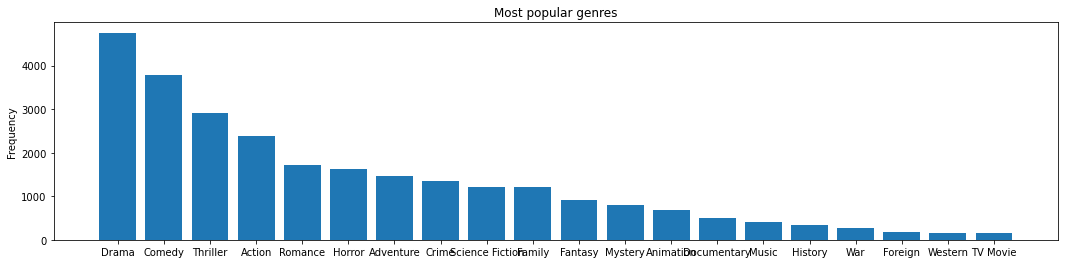

In [292]:
fig, ax = plt.subplots(figsize = (18,4))
ax.bar(to_1D(df['genres']).value_counts().index,
        to_1D(df['genres']).value_counts().values)
ax.set_ylabel("Frequency")
ax.set_title("Most popular genres")

**Result**  
Drama comes in the first place, Comedy in the second place then Thriller in the third place

### 2. Top 10 popular movies vs Top 10 voted movies?

In [293]:
# lets sort the movies by popularity then take the top 10 movies
movies_pop = df.sort_values(["popularity"], ascending = False)
# lets sort the movies by voting then take the top 10 movies
movies_vot = df.sort_values(["vote_average"], ascending = False)

Text(0.5, 0.98, 'Top 10 popular movies vs Top 10 voted movies')

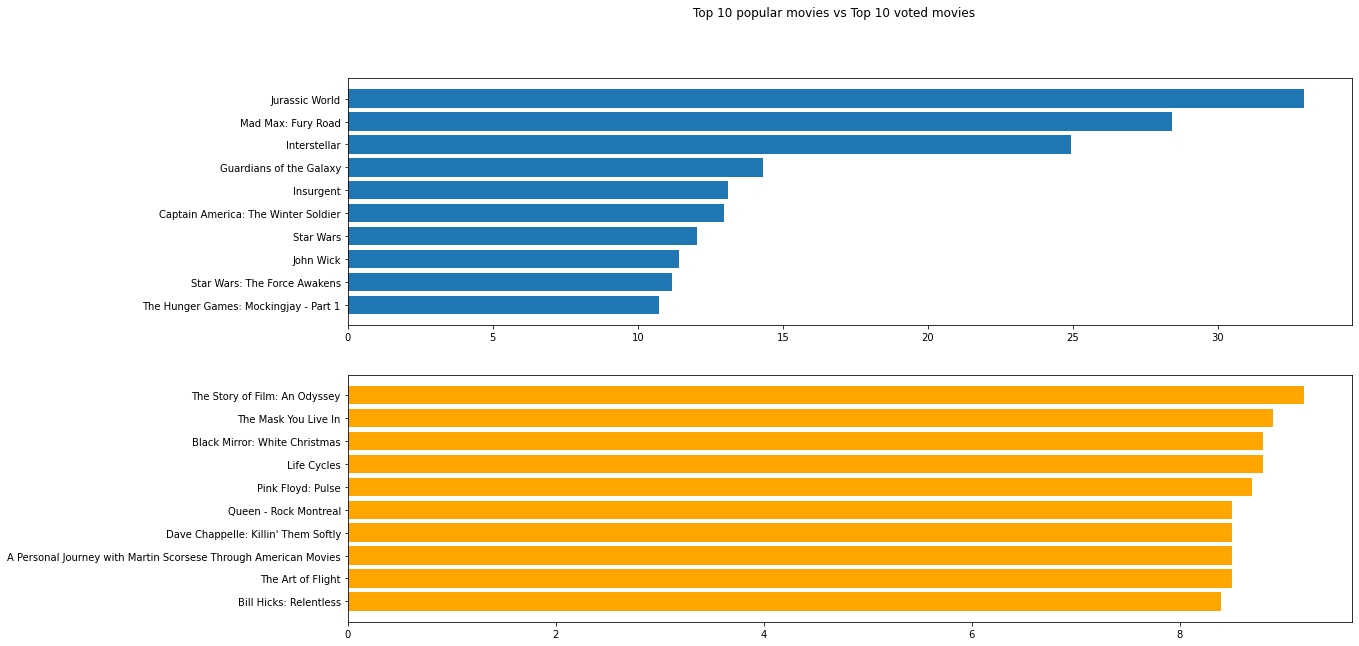

In [294]:
fig, (ax1, ax2) = plt.subplots(2,figsize = (18,10))

x1 = movies_pop['original_title'].head(10)
x2 = movies_vot['original_title'].head(10)
y1 = movies_pop['popularity'].head(10)
y2 = movies_vot['vote_average'].head(10)

ax1.barh(x1,y1)
ax2.barh(x2,y2,color="orange")

# Show top values
ax1.invert_yaxis()
ax2.invert_yaxis()

fig.suptitle('Top 10 popular movies vs Top 10 voted movies')

**Result**  
"Jurassic World" is the most popular movie, where "The Story of Film: An Odyssey" is the most voted movie

### 3. Top 10 profitable Movies

In [295]:
# we will use the profit column that was added at data wrangling
# lets sort the movies by profit then take the top 10 movies
movies_prof_adj = df.sort_values(["profit_adj"], ascending = False)
movies_prof = df.sort_values(["profit"], ascending = False)

Text(0.5, 0.98, 'Top 10 profitable movies')

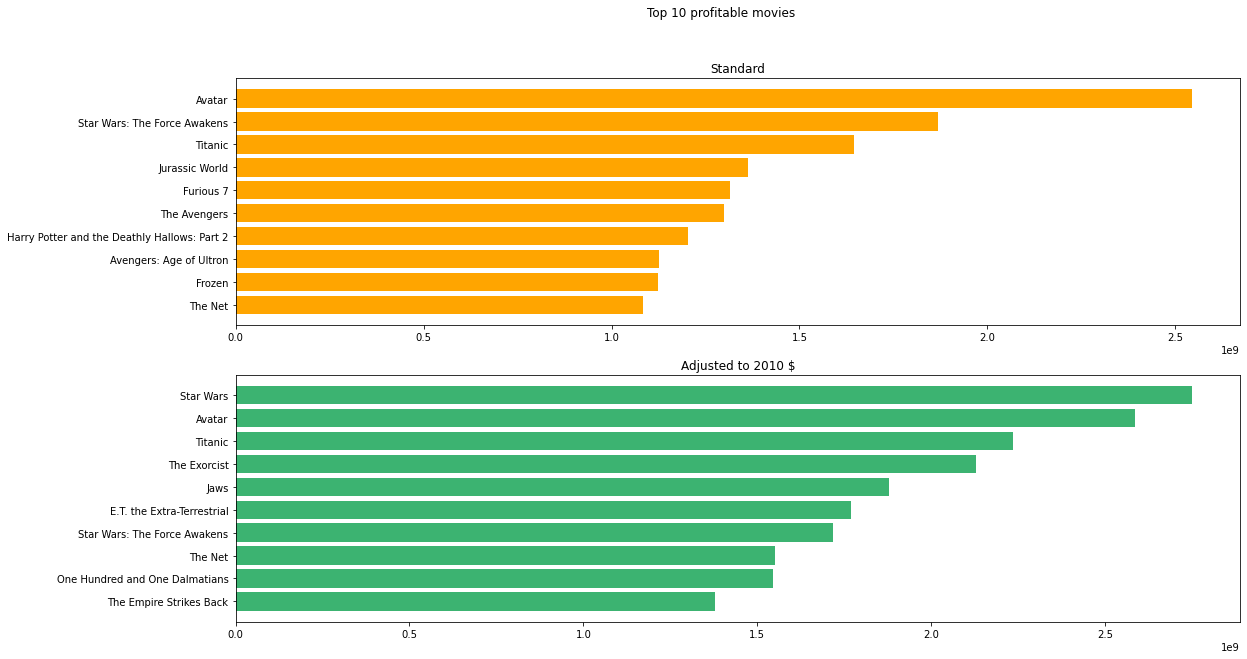

In [296]:
fig, (ax1, ax2) = plt.subplots(2,figsize = (18,10))

x1 = movies_prof['original_title'].head(10)
x2 = movies_prof_adj['original_title'].head(10)
y1 = movies_prof['profit'].head(10)
y2 = movies_prof_adj['profit_adj'].head(10)

ax1.barh(x1,y1,color="orange",)
ax2.barh(x2,y2,color="mediumseagreen")

# Show top values
ax1.invert_yaxis()
ax2.invert_yaxis()
ax1.set_title("Standard")
ax2.set_title("Adjusted to 2010 $")

fig.suptitle('Top 10 profitable movies')

**Result**  
The Top 3 are profitable movies are "Star Wars", "Avatar" and "Titanic"

### 4. What kinds of properties are associated with movies that have high revenues?

Let's see the relation ship between the revenue and other properties

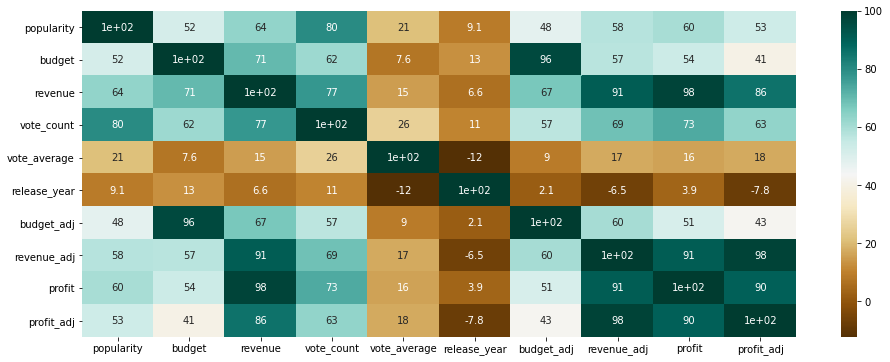

In [297]:
plt.figure(figsize=(16, 6))

sns.heatmap(df.corr()*100, cmap="BrBG", annot=True);

**Result**  
Looking at the *"revenue"* row, we can see how much each column affect the revenue in percentage.  

**vote_count** scored **77%**  
**budget** scored **71%**  
**popularity** scored **64%**  

We will neglect **vote_count** to avoid implying causation from correlation!  
So **popularity** and **budget** are the most affecting to the revenue

<a id='conclusions'></a>
## Conclusions

##### Limitations and assumptions 
1. Handling the zeros in budget and revenue, can be done by other methods and may result different insights
2. Dropping the production_companies column decreased the lose of data (rows) as we resulted with 10800 from 10866 rows
3. The data about generes and production_companies was combined and needs more wrangling for more better insights 
4. The countries also may make a difference, as the most popular is US movies
5. We can make more insights later according to time analysis for the release of the movies

##### Results
1. Most popular Generes: **Drama** comes in the first place, **Comedy** in the second place then **Thriller** in the third place
2. **"Jurassic World"** is **the most popular movie**, where **"The Story of Film: An Odyssey"** is **the most voted movie**
3. The Top 3 profitable movies are **"Star Wars"**, **"Avatar"** and **"Titanic"**
4. Properties (**popularity** and **budget**) are the most affecting to the revenue